# California Housing Price Predictor 
## Version 1.0 : Linear Regression

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,root_mean_squared_error


## The data set

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


## About this file

1. longitude: A measure of how far west a house is; a higher value is farther west

2. latitude: A measure of how far north a house is; a higher value is farther north

3. housingMedianAge: Median age of a house within a block; a lower number is a newer building

4. totalRooms: Total number of rooms within a block

5. totalBedrooms: Total number of bedrooms within a block

6. population: Total number of people residing within a block

7. households: Total number of households, a group of people residing within a home unit, for a block

8. medianIncome: Median income for households within a block of houses (measured in tens of thousands of US Dollars)

9. medianHouseValue: Median house value for households within a block (measured in US Dollars)

10. oceanProximity: Location of the house w.r.t ocean/sea

## Exploratory Data Analysis (EDA)

In [4]:
df.shape


(20640, 10)

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [15]:
df.isnull()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False


<Axes: xlabel='median_house_value', ylabel='Count'>

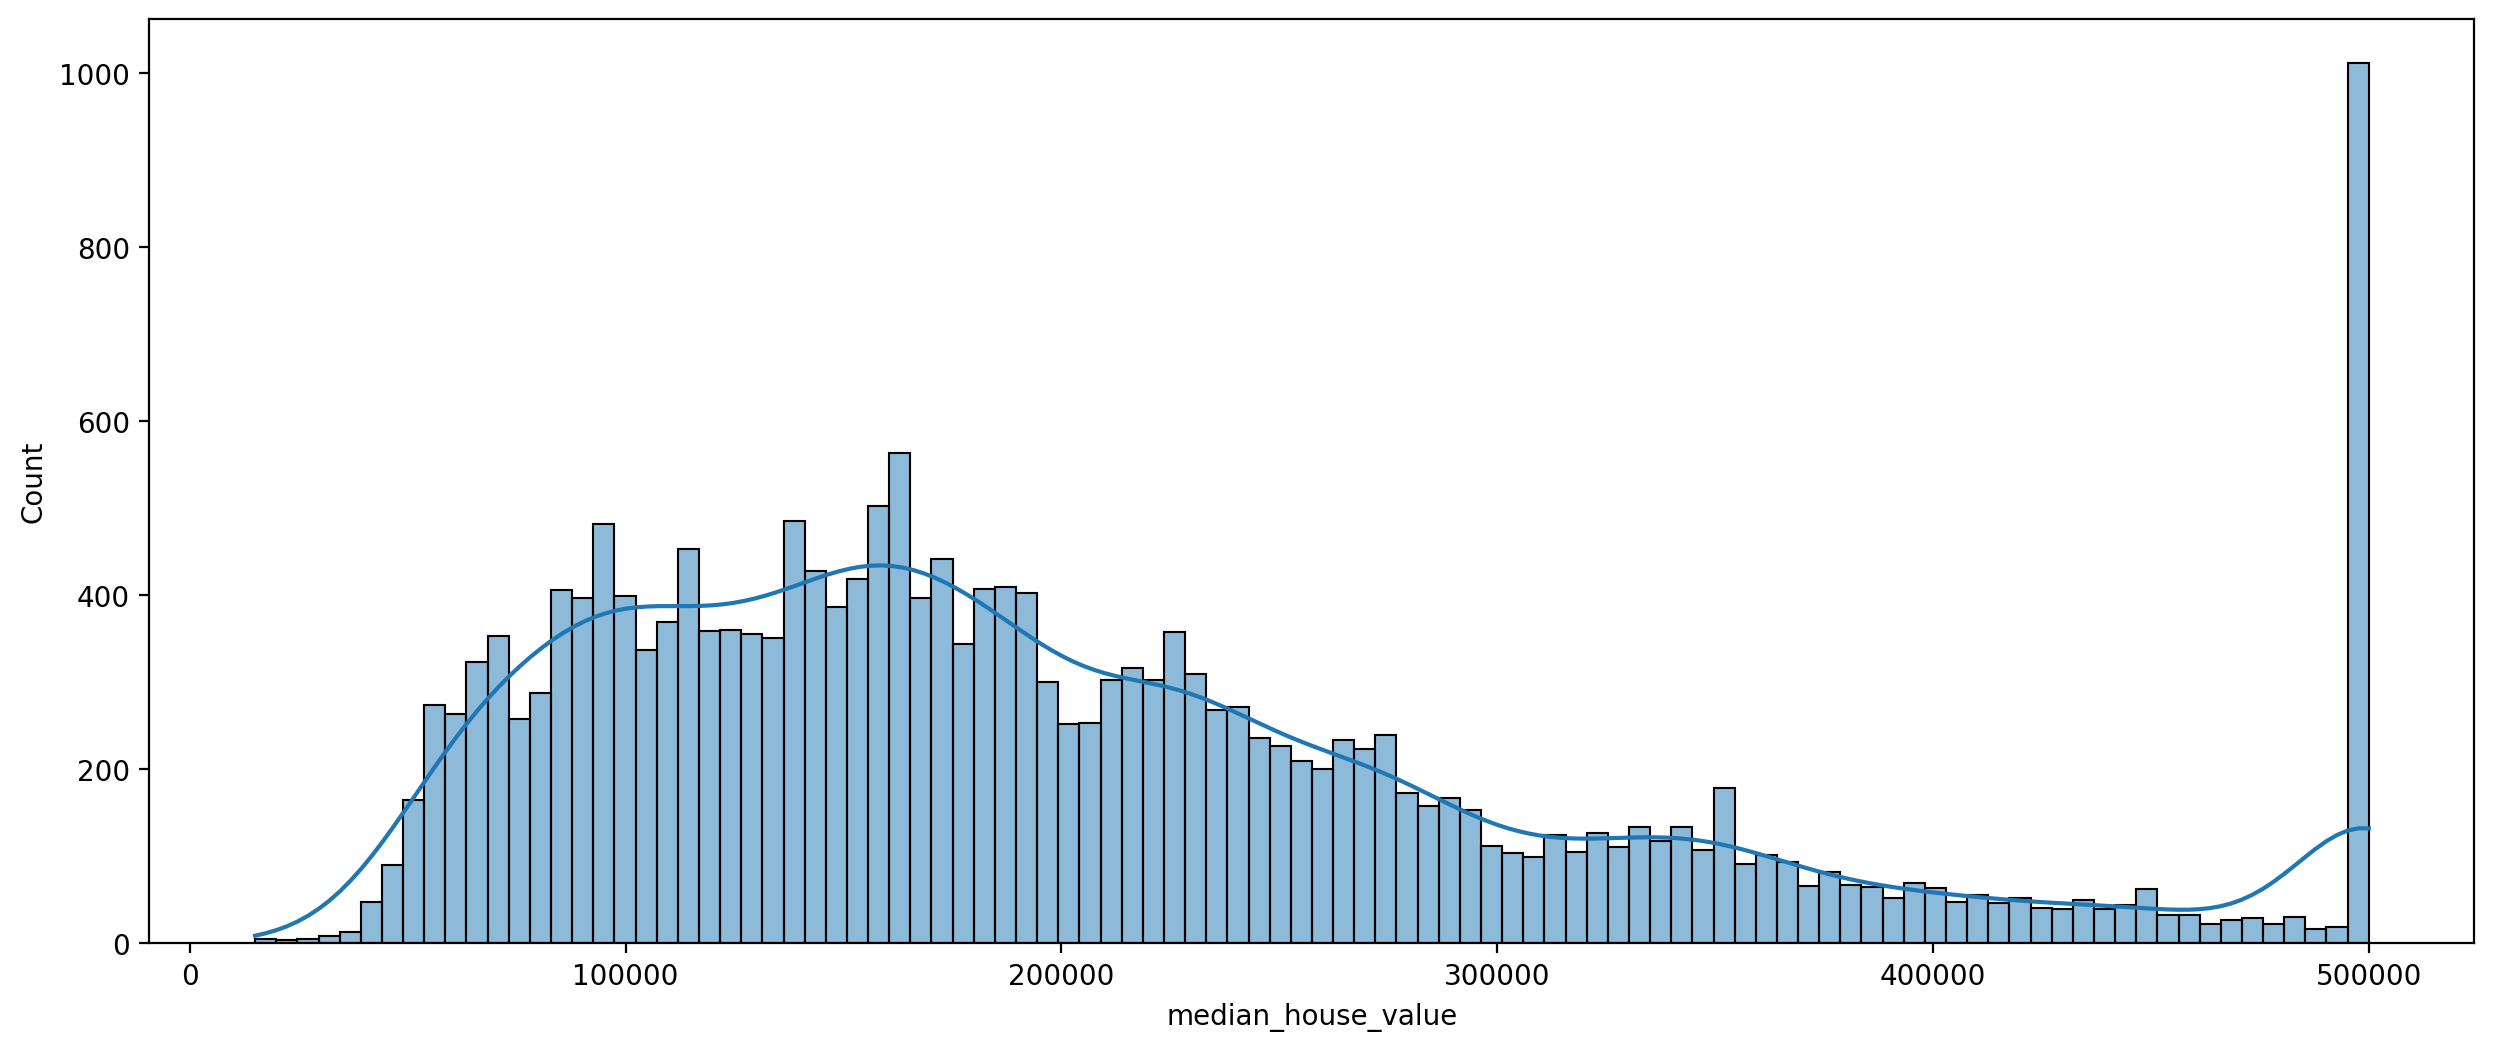

In [48]:
plt.figure(figsize=(15, 6), dpi=200)
sns.histplot(data=df, x='median_house_value', bins=100, kde=True)

## Preprocessing
### Define features and label:

In [17]:
X = df.drop(['median_house_value', 'ocean_proximity'], axis=1)
X = X.fillna(X.median())
X


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462
...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672


In [11]:
y = df['median_house_value']
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20640, dtype: float64

### Train-test split:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Model Building
### Fit Linear Regression:

In [23]:
model = LinearRegression()


In [24]:
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


### Predictions:

In [25]:
test_predictions = model.predict(X_test)

In [26]:
test_predictions

array([ 64628.40149726, 153831.7442614 , 250210.6290594 , ...,
       283790.08706496, 128164.26276153, 213772.09884702], shape=(6192,))

## Model Evaluation

In [28]:
print(f"the MAE is {mean_absolute_error(y_test, test_predictions)}")

the MAE is 51048.95198217267


In [29]:
print(f"the MSE is {mean_squared_error(y_test, test_predictions)}")

the MSE is 4856976755.9128065


In [30]:
print(f"the RMSE is {root_mean_squared_error(y_test, test_predictions)}")

the RMSE is 69692.01357338448


### Actual vs Predicted plot:

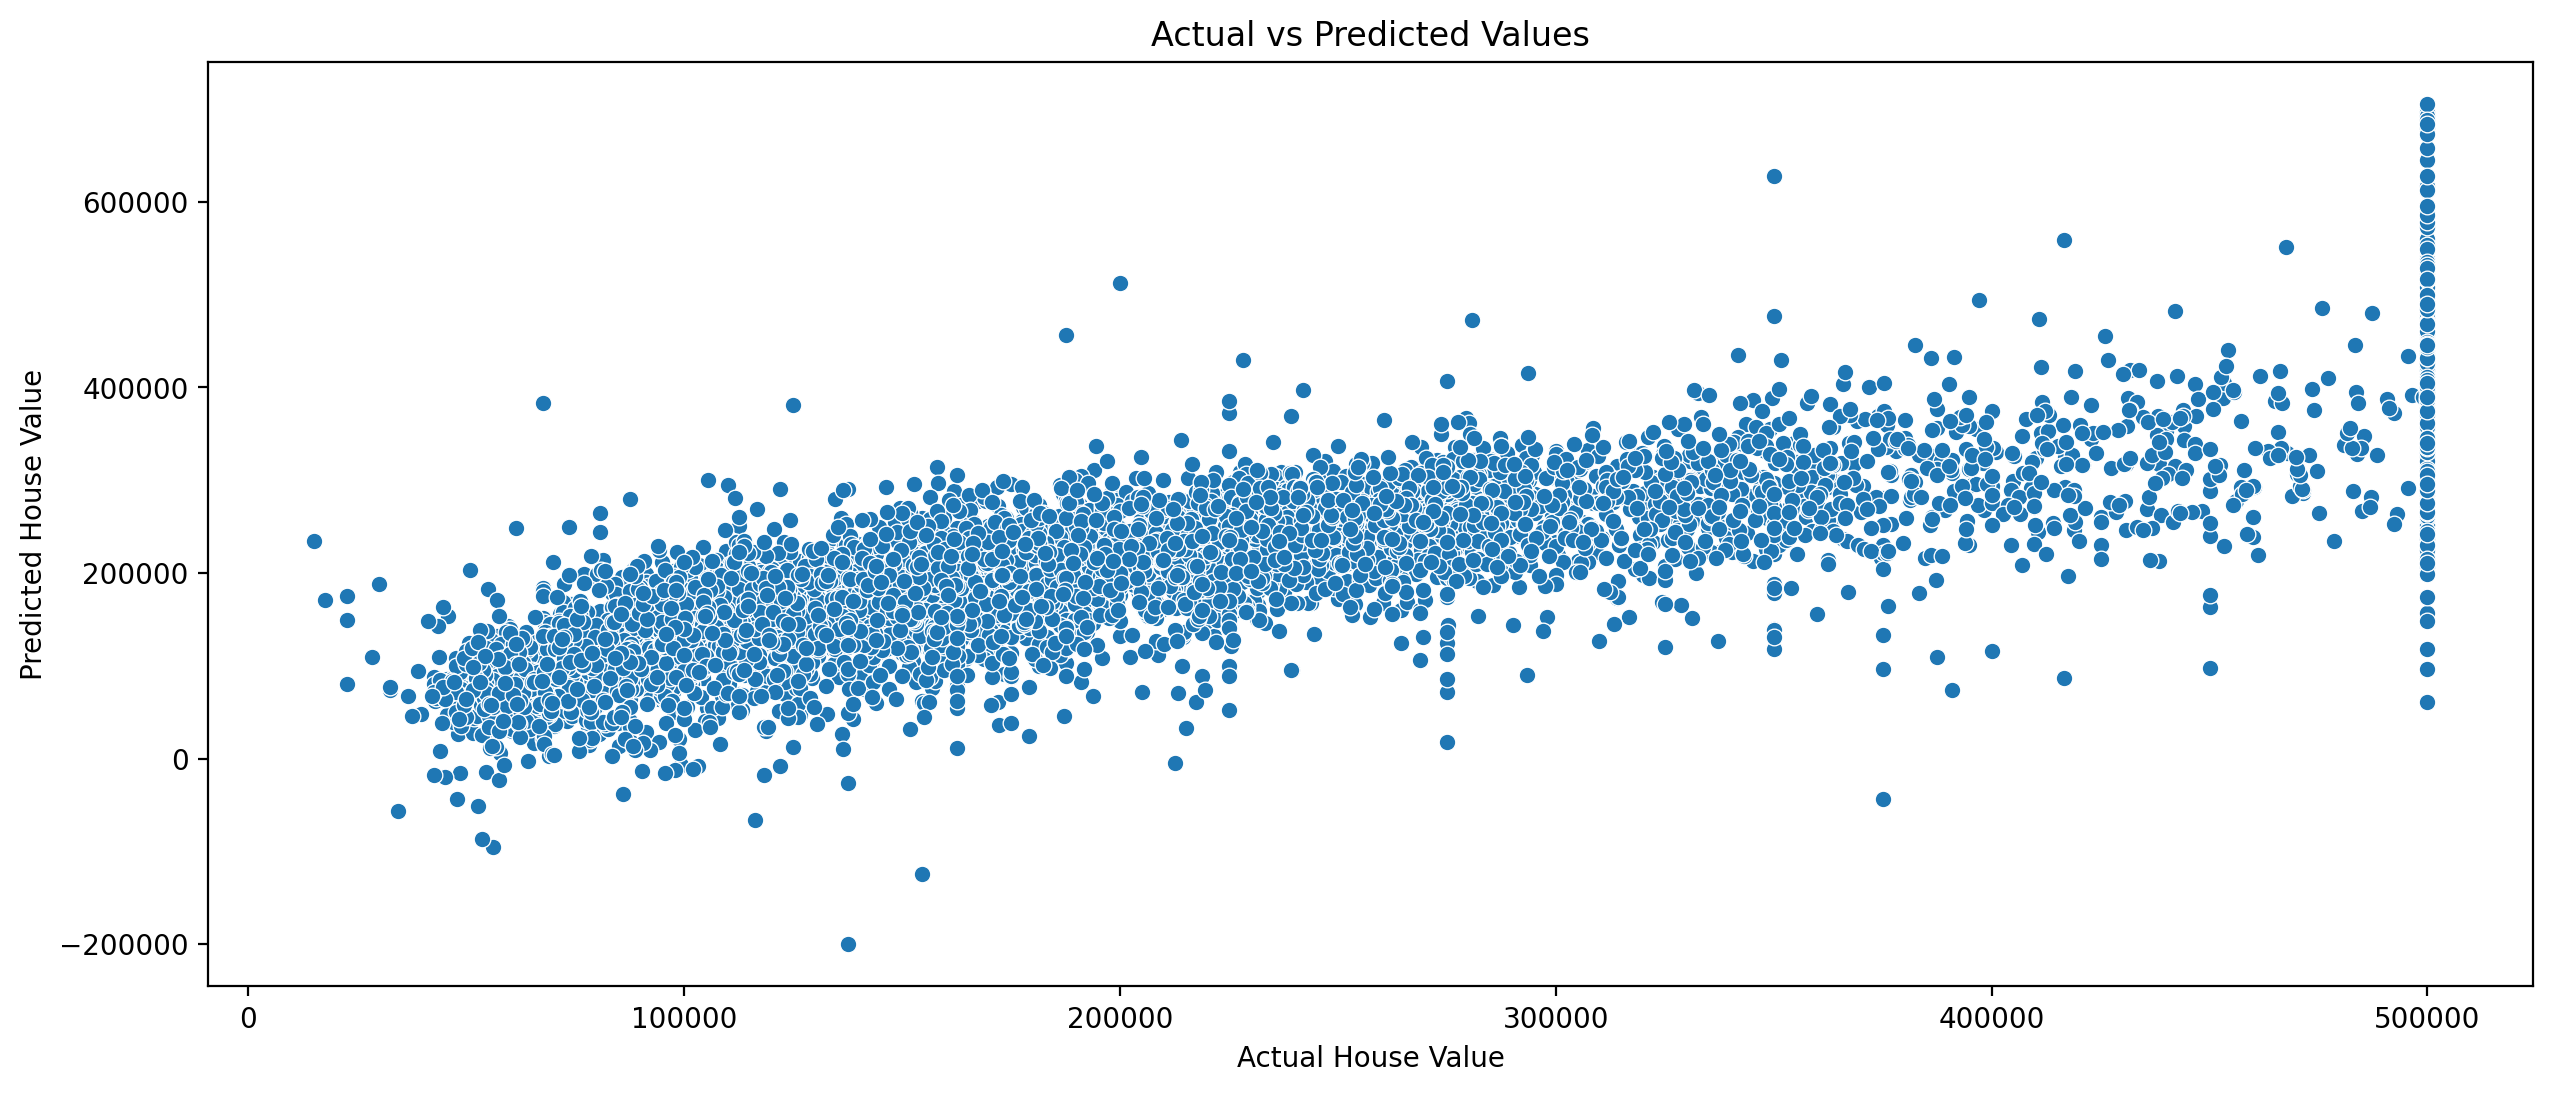

In [ ]:
plt.figure(figsize=(15, 6), dpi=200)
sns.scatterplot(x=y_test, y=test_predictions)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Actual vs Predicted Values")
plt.show()


### Residual Plot

In [34]:
test_residuals = y_test - test_predictions

In [35]:
test_residuals

20046    -16928.401497
3024    -108031.744261
15663    249790.370941
20484    -44403.193676
9814      11107.950330
             ...      
17505     20127.910155
13512    -16722.216060
10842    -65390.087065
16559     -8764.262762
5786      -3972.098847
Name: median_house_value, Length: 6192, dtype: float64

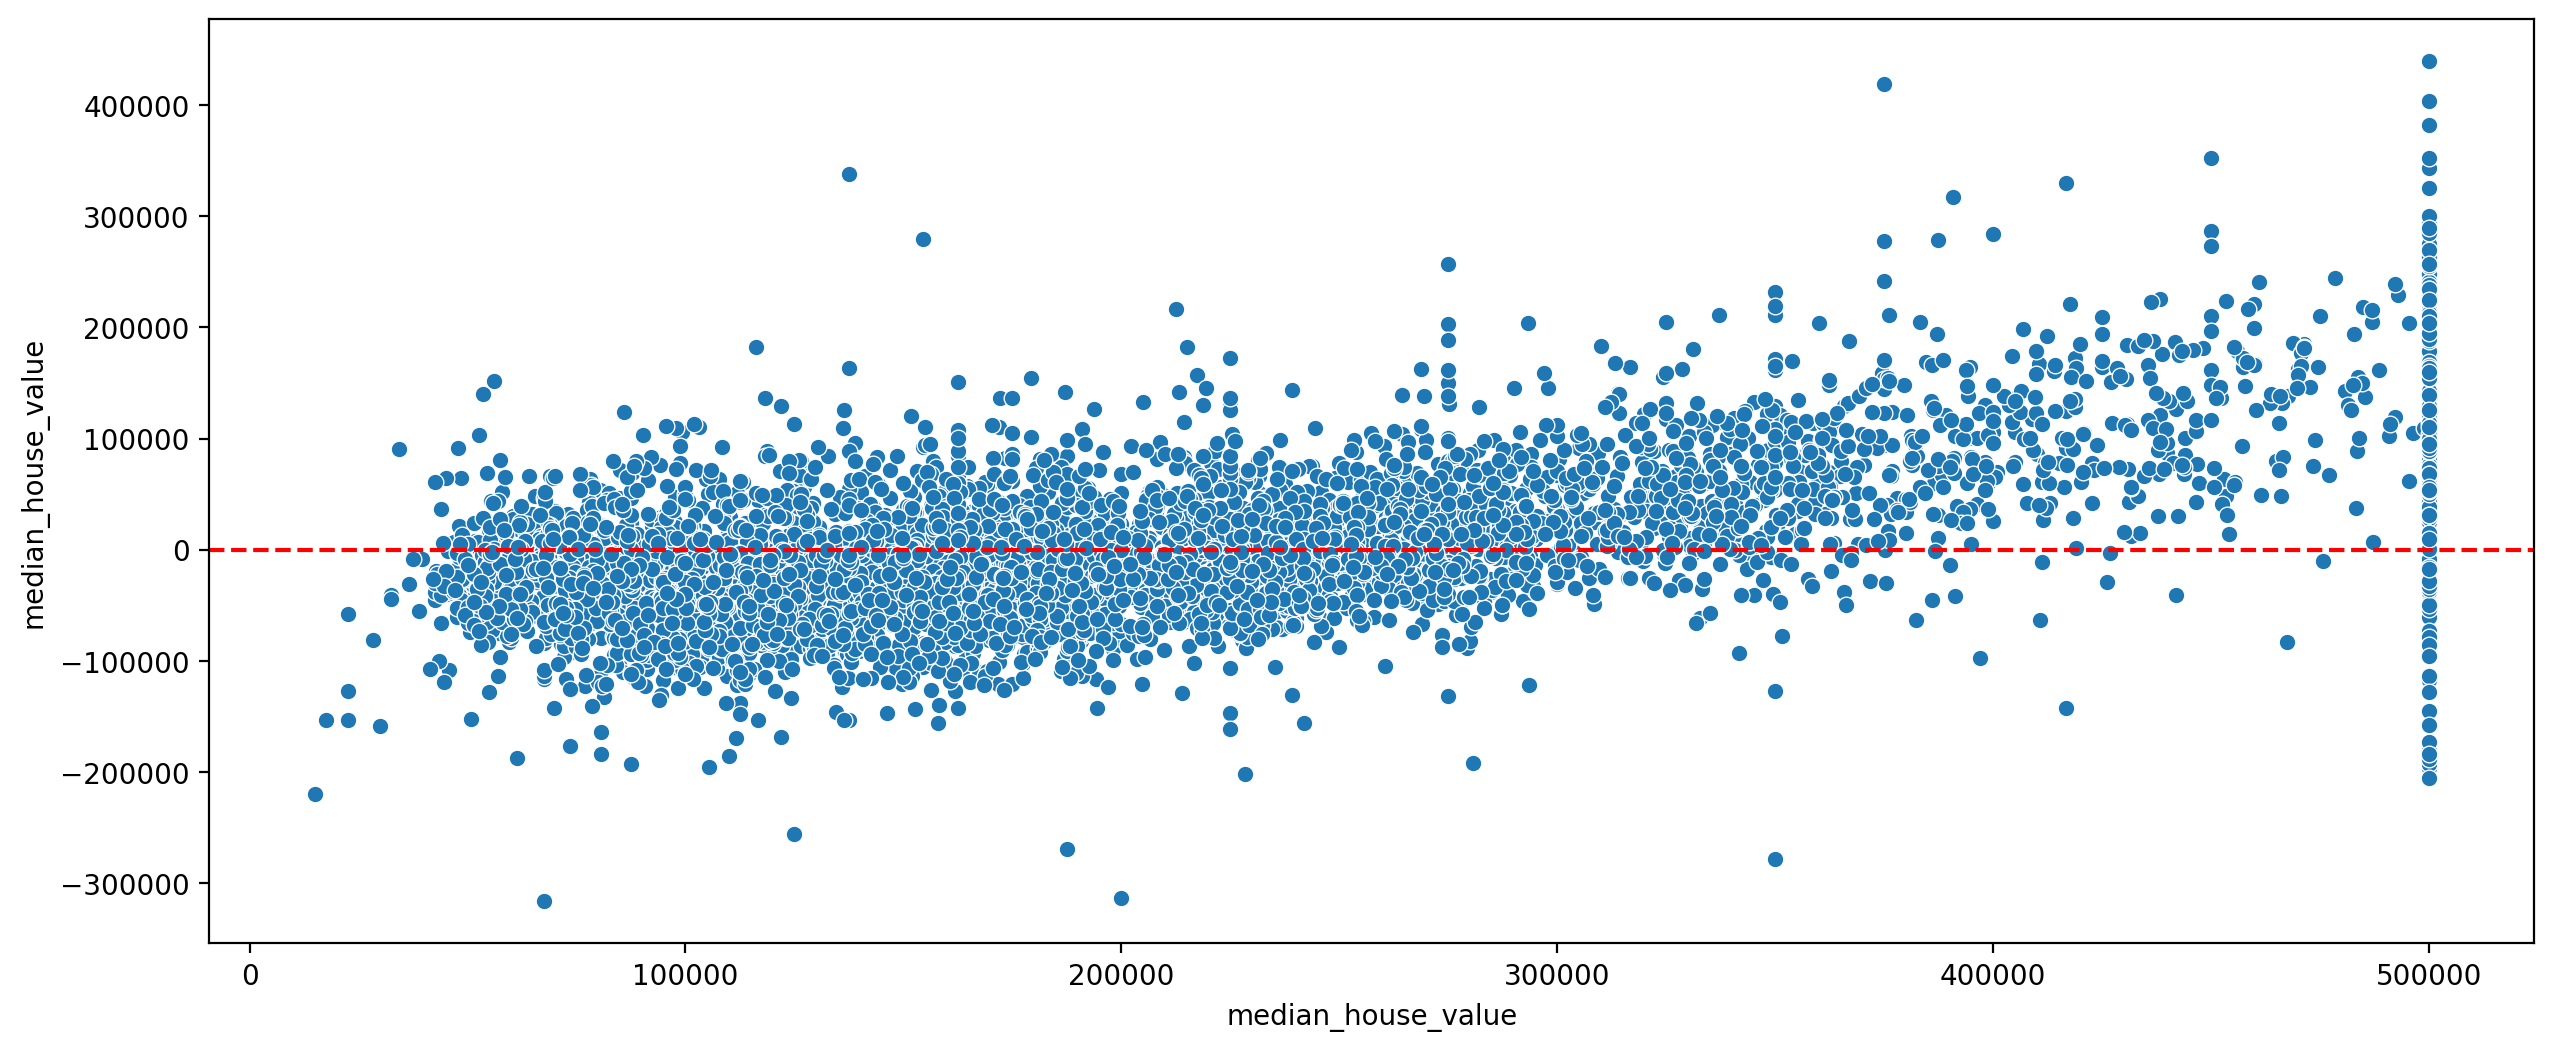

In [37]:
plt.figure(figsize=(15, 6), dpi=200)
sns.scatterplot(x=y_test, y= test_residuals)
plt.axhline(y=0, color='red', ls='--')

## Deployment

In [49]:
final_model = LinearRegression()

In [50]:
final_model.fit(X,y)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [51]:
final_model.coef_

array([-4.26104026e+04, -4.24754782e+04,  1.14445085e+03, -6.62091740e+00,
        8.11609666e+01, -3.98732002e+01,  7.93047225e+01,  3.97522237e+04])

In [52]:
y_hat = final_model.predict(X)

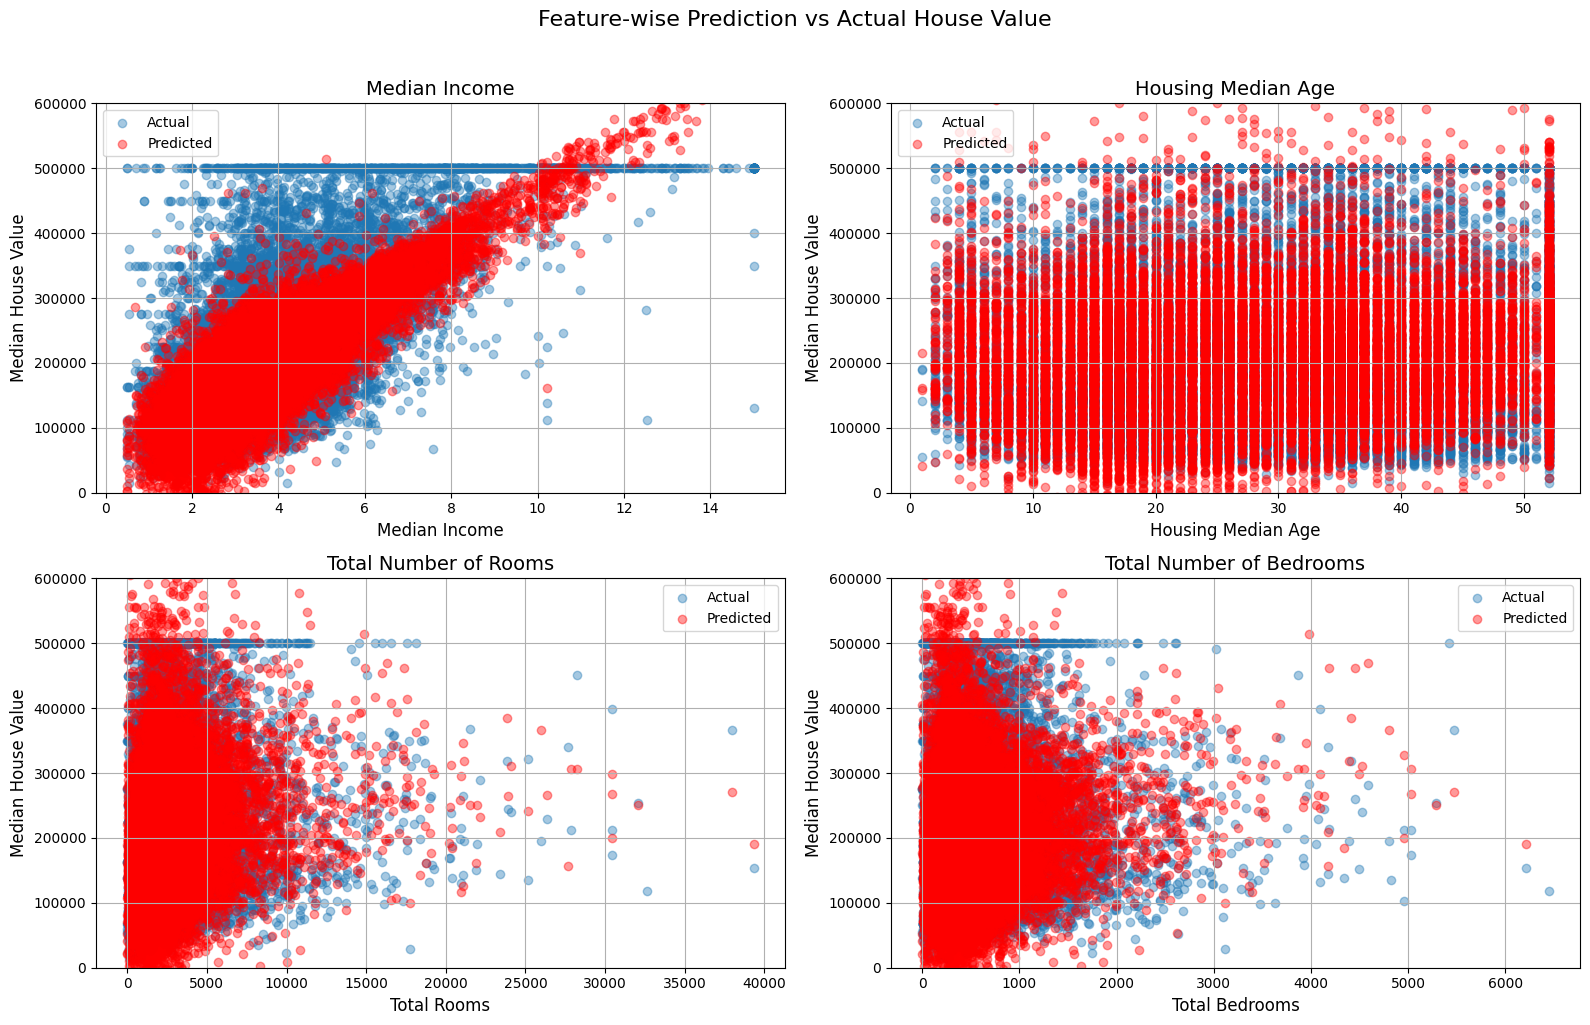

In [67]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
fig.suptitle("Feature-wise Prediction vs Actual House Value", fontsize=16, y=1.02)

# Common settings
features = ['median_income', 'housing_median_age', 'total_rooms', 'total_bedrooms']
titles = ['Median Income', 'Housing Median Age', 'Total Number of Rooms', 'Total Number of Bedrooms']
y_max = 600000

for ax, feature, title in zip(axes.flat, features, titles):
    ax.scatter(df[feature], df['median_house_value'], label='Actual', alpha=0.4)
    ax.scatter(df[feature], y_hat, color='red', label='Predicted', alpha=0.4)
    
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(feature.replace('_', ' ').title(), fontsize=12)
    ax.set_ylabel("Median House Value", fontsize=12)
    ax.set_ylim(0, y_max)
    ax.grid(True)
    ax.legend()

plt.tight_layout()
plt.show()

## Saving the model

In [60]:
from joblib import dump, load

In [62]:
dump(final_model, 'final_houseing_model.joblib')

['final_houseing_model.joblib']

## Loading the model

In [63]:
loaded_model = load('final_sales_model.joblib')

In [64]:
loaded_model.coef_

array([-4.26104026e+04, -4.24754782e+04,  1.14445085e+03, -6.62091740e+00,
        8.11609666e+01, -3.98732002e+01,  7.93047225e+01,  3.97522237e+04])

## Predicting using this model

In [65]:
new = [[-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252]]


In [66]:
loaded_model.predict(new)

c:\PythonADV\venv_pyadv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([408844.60843985])